In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(r"C:\Users\ASUS\Downloads\Dataset.csv")

In [5]:
data = pd.DataFrame(dataset)

In [6]:
data


,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,10-06-18,5,140,47,38,1
1435,Friday,10-06-18,5,141,15,8,4
1436,Friday,10-06-18,5,142,26,38,1
1437,Friday,10-06-18,5,143,16,34,3


In [7]:
data.isnull().sum()

Day            0
Date           0
CodedDay       0
Zone           0
Weather        0
Temperature    0
Traffic        0
dtype: int64

In [8]:
data.describeI()


AttributeError: 'DataFrame' object has no attribute 'describeI'

In [9]:
data.describe()

,CodedDay,Zone,Weather,Temperature,Traffic
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,4.000695,72.549687,23.886032,25.011119,3.031967
std,1.733054,41.554330,13.576787,11.325376,1.429018
min,1.000000,1.000000,0.000000,6.000000,1.000000
25%,3.000000,37.000000,12.000000,15.000000,2.000000
50%,4.000000,73.000000,24.000000,25.000000,3.000000
75%,5.000000,108.500000,35.000000,35.000000,4.000000
max,7.000000,144.000000,47.000000,45.000000,5.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()


In [16]:
data["Date"] = le.fit_transform(data["Date"])

In [17]:
data


,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,0,3,2,35,17,2
1,Wednesday,0,3,3,36,16,3
2,Wednesday,0,3,4,27,25,5
3,Wednesday,0,3,5,23,23,3
4,Wednesday,0,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,9,5,140,47,38,1
1435,Friday,9,5,141,15,8,4
1436,Friday,9,5,142,26,38,1
1437,Friday,9,5,143,16,34,3


In [18]:
data["Day"] = le.fit_transform(data["Day"])

In [19]:
data


,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,6,0,3,2,35,17,2
1,6,0,3,3,36,16,3
2,6,0,3,4,27,25,5
3,6,0,3,5,23,23,3
4,6,0,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,0,9,5,140,47,38,1
1435,0,9,5,141,15,8,4
1436,0,9,5,142,26,38,1
1437,0,9,5,143,16,34,3


In [20]:
X = data.iloc[:, 2:6].values
y = data.iloc[:, 6:7].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
     

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=300, random_state=0)

In [24]:

y_pred = regressor.predict(X_test)

In [25]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
else:
    y_pred=np.round(y_pred+0.5)

In [26]:
df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 
a=100-df1
print("Accuracy= ",a,"%")

Error =  13.42 %
Accuracy=  86.58 %


In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)
     

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
y_pred = regressor.predict(X_test)
y_pred

array([2.48568787, 3.83075078, 3.2936518 , 3.1673047 , 2.92523973,
       2.31572795, 2.36996983, 2.19128844, 3.66497598, 2.56215864,
       3.09770455, 3.37561416, 2.86955855, 2.70819912, 2.51284476,
       2.60066084, 2.4309671 , 2.37138504, 3.18637153, 2.83358309,
       3.60021418, 2.48652871, 3.03685709, 2.39762196, 2.497879  ,
       3.11026378, 2.99161215, 3.69680818, 3.09097039, 2.62917555,
       2.84167464, 3.26385761, 2.957667  , 3.15259094, 3.1129895 ,
       2.65382723, 2.64573348, 4.17701652, 3.1214746 , 2.59892333,
       2.54551056, 3.67757031, 2.76428867, 3.82274378, 3.06953225,
       2.93527699, 2.77584091, 2.67888664, 2.3393692 , 3.94660356,
       2.98060755, 3.72745618, 4.06289067, 3.18461613, 2.79760641,
       3.16032156, 2.40107766, 3.05992469, 2.50326614, 3.14948545,
       2.0258538 , 2.39031143, 2.5313014 , 2.06376862, 3.25822173,
       3.8331732 , 2.91792523, 4.16926464, 2.99944268, 2.72893788,
       2.7935679 , 3.48603414, 3.09625424, 3.2274822 , 3.18776

In [29]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

y_pred

array([2., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 3., 2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 2., 3.,
       3., 2., 2., 4., 3., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 3., 2.,
       3., 4., 3., 2., 3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 2., 4.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 3., 1., 2., 3., 3., 2.,
       2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2., 3., 3., 3., 2., 3.,
       2., 3., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 3., 3., 2., 3., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 1., 4., 3.,
       3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3.,
       3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 3., 1., 2., 2., 3.,
       2., 3., 2., 3., 2., 3., 3., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 2., 2., 2.

In [29]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

y_pred

array([2., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 3., 2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 2., 3.,
       3., 2., 2., 4., 3., 2., 2., 3., 2., 3., 3., 2., 2., 2., 2., 3., 2.,
       3., 4., 3., 2., 3., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 2., 4.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 3., 1., 2., 3., 3., 2.,
       2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2., 3., 3., 3., 2., 3.,
       2., 3., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 3., 3., 2., 3., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2., 3., 3., 1., 4., 3.,
       3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3.,
       3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 3., 3., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 3., 1., 2., 2., 3.,
       2., 3., 2., 3., 2., 3., 3., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 2., 2., 2.

In [30]:

df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 

Error =  12.16 %


In [31]:
a=100-df1
print("Accuracy= ",a,"%")

Accuracy=  87.84 %


In [33]:
print("Error = ",df1,"%")
print("Accuracy= ",a,"%")

Error =  12.16 %
Accuracy=  87.84 %


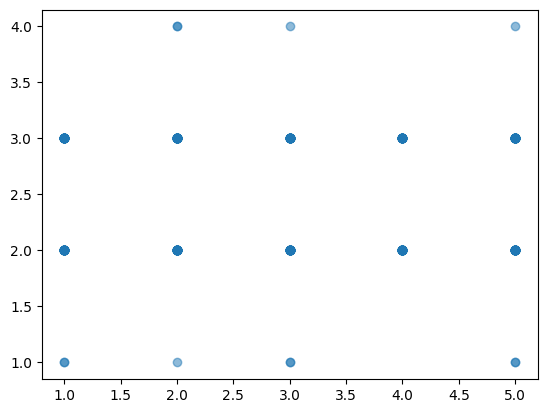

In [51]:
# sns.distplot(y_pred-y_test)
plt.scatter(y_test , y_pred , alpha = 0.5)
plt.show()
